In [1]:
%matplotlib inline

import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = 5, 5

In [2]:
data = pd.read_csv('./BD3.csv')
data

,IDcliente,GENERO,INGRESOS,ESTADOCIVIL,SEXO,EDAD,ROLLABORAL,GASTOSADMIN,CASADO
0,1,1,2694,0,1,25,Profesional,"1500,35",False
1,2,1,1755,1,1,81,Independiente,"1500,35",True
2,3,1,1635,0,1,54,Independiente,"1500,35",False
3,4,0,1597,1,0,56,Independiente,"1500,35",True
4,5,1,1867,1,1,65,Empresario,"1500,35",True
5,6,1,2401,0,1,76,Independiente,"1500,35",False
6,7,0,1516,0,0,29,Empleado,"1500,35",False
7,8,0,2703,0,0,29,Empleado,"1500,35",False
8,9,0,2228,0,0,28,Profesional,"1500,35",False
9,10,1,1648,0,1,25,Empresario,"1500,35",False


In [3]:
#1
((data['EDAD']<18).any())


True

In [4]:
#2
data.isnull().any()

IDcliente      False
GENERO         False
INGRESOS       False
ESTADOCIVIL    False
SEXO           False
EDAD           False
ROLLABORAL      True
GASTOSADMIN    False
CASADO         False
dtype: bool

In [5]:
#4
((data['GASTOSADMIN']!=1500.35).all())

True

In [6]:
#3
data['SEXO'].unique()

array([1, 0])

In [7]:
data['GENERO'].unique()

array([1, 0])

In [8]:
data['ESTADOCIVIL'].unique()

array([0, 1])

In [9]:
#4.1
data['GASTOSADMIN'].unique()

array(['1500,35'], dtype=object)

In [10]:
data['EDAD'].unique()

array([ 25,  81,  54,  56,  65,  76,  29,  28,  70,  38,  68,  77,  58,
        22,  73,  23,  57,  32,  26,  72,  85,  16,  82,  33,  75,  19,
        79,  17,  30,  66,  35,  20,  21,  41,  50,  18,  40,  52,  48,
        34,  63,  61,  31,  49,  36,  59,  39,  74,  83,  62,  80,  53,
        47,  60,  71,  84,  78,  64,  43,  44,  69,  55,  24,  37,  27,
        51,  42,  67,  46,  45, 150, 112])

In [11]:
#4.2
(data['GENERO'] == data['SEXO']).all()

True

In [12]:
data['CASADO'].unique()

array([False,  True])

In [13]:
data=data.dropna()

In [14]:
data.isnull().any()

IDcliente      False
GENERO         False
INGRESOS       False
ESTADOCIVIL    False
SEXO           False
EDAD           False
ROLLABORAL     False
GASTOSADMIN    False
CASADO         False
dtype: bool

In [15]:
data3={'Monedas':['Dolares','Pesos','Dolares', 'Pesos'],
      'Año': [2002,2002,2010,2010],
      'Enero' : [4000, 9000, 1000, 41000],
      'Febrero' : [6000,12000,13000,52000],
      'Marzo': [7000, 21000, 11000, 43000],
      'Abril': [5000, 15000, 15000, 61000],
      'Mayo': [5000, 19000, 16000, 63000],
      'Junio': [7000, 28000, 24000, 95000],
      'Julio': [5000, 18000, 14000, 57000],
      'Agosto': [4000, 13000, 11000, 45000],
      'Septiembre': [4000, 13000, 9000, 36000],
      'Octubre': [5000, 17000, 11000, 42000],
      'Noviembre': [4000, 16000, 13000, 53000],
      'Diciembre': [8000, 27000, 22000, 88000],}
data_table=pd.DataFrame.from_dict(data3)

In [16]:
group=data_table[data_table['Monedas'] == 'Dolares']
group

,Monedas,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,Dolares,2002,4000,6000,7000,5000,5000,7000,5000,4000,4000,5000,4000,8000
2,Dolares,2010,1000,13000,11000,15000,16000,24000,14000,11000,9000,11000,13000,22000


In [17]:
del group['Monedas']

In [18]:
tabla_final=group.set_index(['Año']).T
tabla_final

Año,2002,2010
Enero,4000,1000
Febrero,6000,13000
Marzo,7000,11000
Abril,5000,15000
Mayo,5000,16000
Junio,7000,24000
Julio,5000,14000
Agosto,4000,11000
Septiembre,4000,9000
Octubre,5000,11000


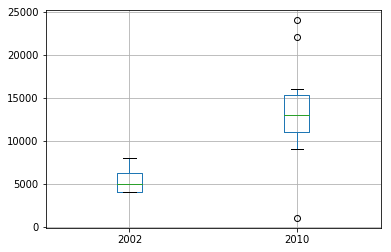

In [19]:
tabla_final.boxplot()

In [20]:
group_pesos=data_table[data_table['Monedas'] == 'Pesos']
group_pesos

,Monedas,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
1,Pesos,2002,9000,12000,21000,15000,19000,28000,18000,13000,13000,17000,16000,27000
3,Pesos,2010,41000,52000,43000,61000,63000,95000,57000,45000,36000,42000,53000,88000


In [21]:
del group_pesos['Monedas']

In [22]:
tabla_final_pesos=group_pesos.set_index(['Año']).T
tabla_final_pesos

Año,2002,2010
Enero,9000,41000
Febrero,12000,52000
Marzo,21000,43000
Abril,15000,61000
Mayo,19000,63000
Junio,28000,95000
Julio,18000,57000
Agosto,13000,45000
Septiembre,13000,36000
Octubre,17000,42000


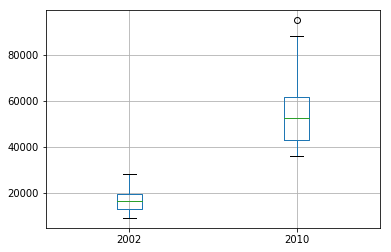

In [23]:
tabla_final_pesos.boxplot()

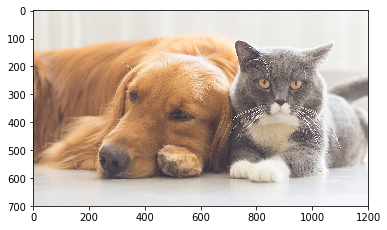

In [27]:
img = cv2.imread('pets.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [28]:
# Propiedades de la imagen

print('Datos: (Alto, Ancho, Cantidad de Canales): {}'.format(img.shape))

Datos: (Alto, Ancho, Cantidad de Canales): (700, 1200, 3)


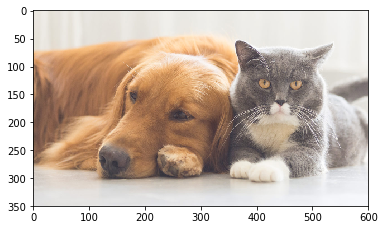

In [29]:
imresize = cv2.resize(img,(600, 350))
plt.imshow(imresize)